In [277]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from openpyxl import load_workbook
from IPython.display import Image
from sklearn.preprocessing import Imputer
from sklearn import tree
from subprocess import check_call
import random as rd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

class Sweet(object):

    def __init__(self, file, cluster = 4):
        wb = pd.read_excel(file)
        data = pd.DataFrame(wb.values)
        data.columns = ['Garbage', 'M01','M02','M03','M04','M05','M06','M07','M08','M09','M010','M011','M012','M013','M014','M015','M016','M017','M018','M019','M020','M021','M022','M023','M024','M025','M026','M027','M028','M029','M030','M031','M032','M033','M034','M035','M036','M037','M038','M039','M040','M041','M042','M043','M044','M045','M046']
#         # data.columns = ["Lantai", "Dinding", "Ventilasi", "Pagar", "Ruang Pelayanan", "Luas Area", "Penyuluhan Program Bank Sampah", "Tersedia Wdah Sesuai Pemilahan", "Jumlah Pengurus", "Pendidikan ketua", "Sistem Gaji", "Pengelola mengikuti Pelatihan", "Rekapitulasi Hasil Perolehan", "Pengumpulan Sampah Nasabah Terjadwal", "Jadwal Pengumpulan Sampah", "Pengumpulan Rutin", "Aktivitas Penjualan Sampah Nasabah", "Bank Sampah Memiliki Kerjasama", "Jumlah Pengempul Sampah yang Bekerjasama", "Kerjasama Dengan Industri Daur Ulang Sampah", "Dijual Semua ke pengepul atau industri daur ulang", "Dimanfaatkan untuk pembuatan produk adur ulang", "Proses Monitoring dan evaluasi", "Proses Monitoring", "Monitoring dan Evaluasi terhadap pengurangan atau peningkatan jumlah nasabah", "Monitoring dan evaluasi terhadap jumlah simpan uang nasabah yang tersimpan", "Hasil Monitoring dan Evaluasi Pengelolaan Bank Sampah Tercatat dengan baik", "Hasil Monitoring dan evaluasi pengelolan bank sampah dilaporkan kepada  pemerintah kota melalui Dinas Lingkungan Hidup", "Tidak lanjut berdasarkan hasil monitoring dan evaluasi", "Jumlah Nasabah", "Nasabah Awal yang Ktif", "Modal Awal", "Kondisi Rata-Rata Berat Sampah Per Bulan", "Rata-Rata Berat Sampah Per Bulan", "Rata-Rata Hasil Tabungan Nasabah", "Rata-Rata Jumlah Penambahan Nasabah", "Rata-Rata Waktu Maksimal Nasabah Baru Bertahan", "Ketentuan Aturan Hukum Sesuai Bentuk Bank Sampah", "Ketetapan Harga Beli Sampah", "Aktivitas Simpan-Pinjam", "Penetapan Jam Kerja", "Sistem Bagi Hasil Penjualan", "Ketentuan Jelas Mengenai Kondisi Sampah", "Ketentuan Jelas Mengenai Berat Minimum Sampah", "Ketentuan Jelas Mengenai Jenis Sampah ", "Tersedia Jasa Penjemputan Sampah"]
        self.garbages = [x for x in data['Garbage']]
        self.dataset = data.drop(['Garbage'], axis=1)
        self.cluster = cluster
        
    def get_data(self):
        return self.dataset
    
    def transform(self): 
        d = self.dataset.fillna(0)
        new_df = list()
        for i, row in d.iterrows():
            v1 = 0
            v2 = 0
            v3 = 0
            v4 = 0
            offset = 0
            vals = 0
            for x in range(1,6):
                vals += row["M0"+ str(x + offset)]

            v1 = vals

            offset = 6
            vals = 0
            for x in range(1,6):
                vals += row["M0"+ str(x + offset)]

            v2 = vals

            offset = 12
            vals = 0
            for x in range(1,17):
                vals += row["M0"+ str(x + offset)]

            v3 = vals 

            offset = 29
            vals = 0
            for x in range(1,17):
                vals += row["M0"+ str(x + offset)]

            v4 = vals
            new_df.append([v1*(10+ rd.random())/2,v2*(10+ rd.random())/2,v3 ,v4] )

        X = pd.DataFrame(new_df).to_numpy()
        self.X = X
        return X
    def get_cluster(self): 
        # membuat model
        model = AgglomerativeClustering(n_clusters=self.cluster, affinity='euclidean', linkage = 'ward')
        model.fit(self.X)
        self.labels = model.labels_
        return model 
    def plot(self):
        label = range(1, 11)
        plt.figure(figsize=(20, 10))
        plt.subplots_adjust(bottom=0.1)
        scatter = list()
        legends = list()
        for i in range(1, self.cluster):
            scatter.append(plt.scatter(self.X[self.labels==i,0], self.X[self.labels==i,1], s=30, label=str(i)))
            legends.append("Cluster {}".format(i))
        plt.legend(scatter, legends, scatterpoints=1, loc='lower left', ncol=3, fontsize=20)
        plt.savefig("plot.png")
        return plt.show()
    def get_group(self):
        groupDict = dict()
        groupList = list()
        lenData = list()
        d = {
            'Garbage': self.garbages,
            'Label': self.labels
        }
        df = pd.DataFrame(d)
        
        for i in range(self.cluster):
            df1 = df[df['Label'] == i]
            df1 = df1.drop(['Label'], axis=1)
            df1.columns = [f"Cluster {i}"]
            lenData.append(len(df1.values))
            data = [x for x in df1[f"Cluster {i}"]]
            groupList.append(data)
        
        max_len = max(lenData)
        
        for i, data in enumerate(groupList):
            len_i = len(data)
            if not max_len == len_i:
                data.extend([None]*(max_len-len_i))
            groupDict[f"Cluster {i}"] = data
        return pd.DataFrame(groupDict)
 

### Initialize Dataset

In [278]:
dataset = Sweet(file = "dataset.xlsx", cluster=3)
dataset.get_data()

,M01,M02,M03,M04,M05,M06,M07,M08,M09,M010,...,M037,M038,M039,M040,M041,M042,M043,M044,M045,M046
0,1,1,1,1,1,1,1,2,2,3,...,3,1,2,1,1,1,2,2,2,1
1,1,1,2,2,2,2,1,2,2,3,...,3,1,2,2,1,2,1,2,2,2
2,1,1,1,2,2,1,2,2,2,3,...,1,1,2,1,2,1,2,1,2,1
3,2,2,2,1,1,1,1,2,2,4,...,2,3,2,1,1,1,1,1,2,1
4,1,1,1,1,1,1,1,2,2,3,...,1,1,2,1,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1,1,1,1,1,1,2,2,2,3,...,2,1,2,2,1,1,2,2,2,1
122,2,2,1,1,1,1,3,2,2,2,...,2,1,2,2,1,1,2,2,2,1
123,2,2,1,1,1,1,3,2,1,2,...,2,1,2,2,1,2,2,2,2,1
124,1,1,1,1,1,1,2,2,2,3,...,2,1,2,1,1,2,1,1,1,1


In [279]:
dataset.garbages

['Bank Sampah 1',
 'Bank Sampah 2',
 'Bank Sampah 3',
 'Bank Sampah 4',
 'Bank Sampah 5',
 'Bank Sampah 6',
 'Bank Sampah 7',
 'Bank Sampah 8',
 'Bank Sampah 9',
 'Bank Sampah 10',
 'Bank Sampah 11',
 'Bank Sampah 12',
 'Bank Sampah 13',
 'Bank Sampah 14',
 'Bank Sampah 15',
 'Bank Sampah 16',
 'Bank Sampah 17',
 'Bank Sampah 18',
 'Bank Sampah 19',
 'Bank Sampah 20',
 'Bank Sampah 21',
 'Bank Sampah 22',
 'Bank Sampah 23',
 'Bank Sampah 24',
 'Bank Sampah 25',
 'Bank Sampah 26',
 'Bank Sampah 27',
 'Bank Sampah 28',
 'Bank Sampah 29',
 'Bank Sampah 30',
 'Bank Sampah 31',
 'Bank Sampah 32',
 'Bank Sampah 33',
 'Bank Sampah 34',
 'Bank Sampah 35',
 'Bank Sampah 36',
 'Bank Sampah 37',
 'Bank Sampah 38',
 'Bank Sampah 39',
 'Bank Sampah 40',
 'Bank Sampah 41',
 'Bank Sampah 42',
 'Bank Sampah 43',
 'Bank Sampah 44',
 'Bank Sampah 45',
 'Bank Sampah 46',
 'Bank Sampah 47',
 'Bank Sampah 48',
 'Bank Sampah 49',
 'Bank Sampah 50',
 'Bank Sampah 51',
 'Bank Sampah 52',
 'Bank Sampah 53',
 '

### Transform Dataset

In [280]:
X = dataset.transform()
X

array([[26.00282535, 45.74965655, 20.        , 26.        ],
       [41.15761899, 45.28110128, 24.        , 26.        ],
       [37.35311596, 51.12379459, 18.        , 26.        ],
       [43.01758062, 50.59798916,  8.        , 26.        ],
       [26.66712335, 45.00449483, 24.        , 27.        ],
       [27.26346286, 51.16554898, 24.        , 28.        ],
       [32.12521644, 66.49221576, 27.        , 28.        ],
       [40.90081739, 43.4607413 , 16.        , 25.        ],
       [45.11364681, 50.51594665, 16.        , 28.        ],
       [50.73645393, 54.34697229, 18.        , 27.        ],
       [25.95611964, 50.59419041, 30.        , 29.        ],
       [46.21089839, 49.12923698, 18.        , 22.        ],
       [25.09654139, 57.92648173, 29.        , 26.        ],
       [38.09917186, 51.68407936, 16.        , 25.        ],
       [36.71020231, 50.24559166, 25.        , 25.        ],
       [37.54788369, 51.26895121, 25.        , 25.        ],
       [37.38073725, 48.

### Clusterizing Data

#### Untuk menentukan dendrogram pada jarak terkecil pada data bank sampah

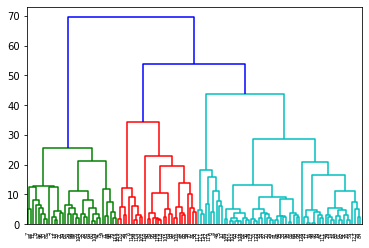

In [281]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.savefig("dendrogram.png")

#### Modelling Cluster

In [282]:
cluster = dataset.get_cluster()
cluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

### Visualization Data

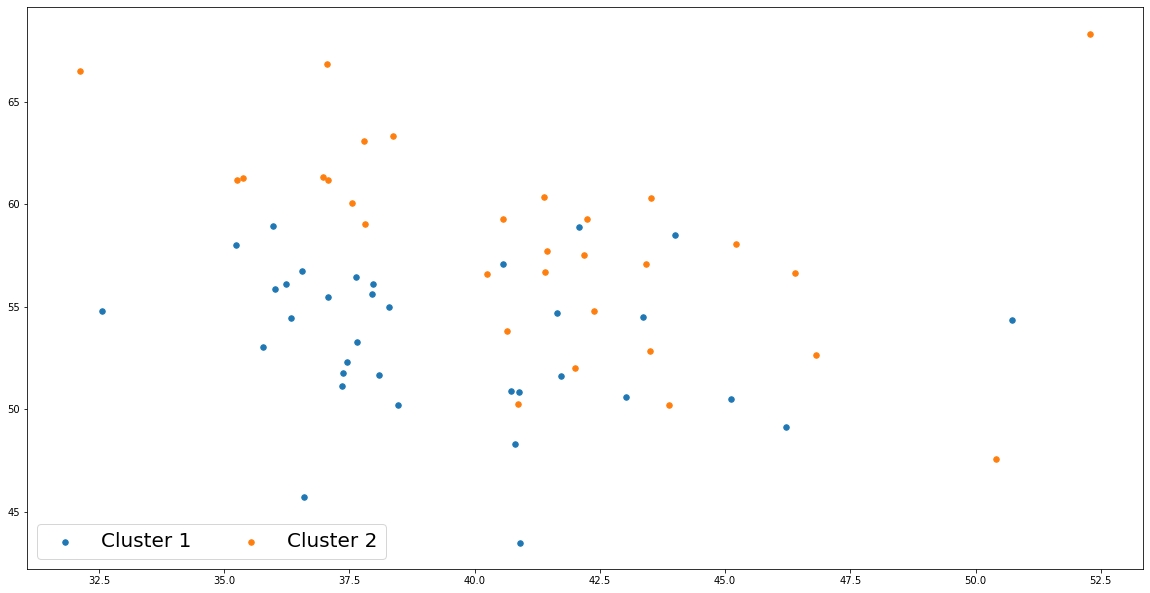

In [283]:
dataset.plot()

In [284]:
groups = dataset.get_group()
groups

,Cluster 0,Cluster 1,Cluster 2
0,Bank Sampah 1,Bank Sampah 3,Bank Sampah 7
1,Bank Sampah 2,Bank Sampah 4,Bank Sampah 27
2,Bank Sampah 5,Bank Sampah 8,Bank Sampah 32
3,Bank Sampah 6,Bank Sampah 9,Bank Sampah 33
4,Bank Sampah 11,Bank Sampah 10,Bank Sampah 35
...,...,...,...
57,Bank Sampah 122,None,None
58,Bank Sampah 123,None,None
59,Bank Sampah 124,None,None
60,Bank Sampah 125,None,None


### Pengujian

In [285]:
dataset.labels

array([0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0])

In [286]:
dataset.X

array([[26.00282535, 45.74965655, 20.        , 26.        ],
       [41.15761899, 45.28110128, 24.        , 26.        ],
       [37.35311596, 51.12379459, 18.        , 26.        ],
       [43.01758062, 50.59798916,  8.        , 26.        ],
       [26.66712335, 45.00449483, 24.        , 27.        ],
       [27.26346286, 51.16554898, 24.        , 28.        ],
       [32.12521644, 66.49221576, 27.        , 28.        ],
       [40.90081739, 43.4607413 , 16.        , 25.        ],
       [45.11364681, 50.51594665, 16.        , 28.        ],
       [50.73645393, 54.34697229, 18.        , 27.        ],
       [25.95611964, 50.59419041, 30.        , 29.        ],
       [46.21089839, 49.12923698, 18.        , 22.        ],
       [25.09654139, 57.92648173, 29.        , 26.        ],
       [38.09917186, 51.68407936, 16.        , 25.        ],
       [36.71020231, 50.24559166, 25.        , 25.        ],
       [37.54788369, 51.26895121, 25.        , 25.        ],
       [37.38073725, 48.

In [287]:
from sklearn import metrics

In [288]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(dataset.X, dataset.labels, metric='euclidean'))

Silhouette Coefficient: 0.286


In [290]:
print("Cluster", 1)

Cluster 1
